# Análise Udemy/Coursera

O objetivo deste notebook é realizar uma análise comparativa entre as duas plataformas MOOC mais populares no Brasil e comparar os cursos que mais crescem entre eles.

#TODO  
Criar dashboard no **Power BI** ou **Tableau**.

# Importação dos dados

### Importando as bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Polygon

### Importando os datasets

In [3]:
udemy_cursos = pd.read_csv('data/udemy_cursos.csv') # https://www.kaggle.com/datasets/hossaingh/udemy-courses
coursera_cursos = pd.read_csv('data/coursera_cursos.csv') # https://www.kaggle.com/datasets/anasmahmood000/coursera-courses-dataset

In [4]:
udemy_cursos.head(5)

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50,709.0,112.0,9.0,88.0,2010-01-12T18:09:46Z,NaN,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.40,41.0,13.0,14.0,82.0,2010-10-13T18:07:17Z,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.80,395.0,88.0,36.0,1511.0,2011-06-20T20:08:38Z,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266.0,4.75,38.0,12.0,38.0,569.0,2011-06-23T18:31:20Z,NaN,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/


In [5]:
coursera_cursos.head(5)

,url,title,associated-university-institution-company,type,image,category-subject-area,certificate-is-available,description,duration,language,level,prerequisites,price,rating,syllabus,timestamp
0,https://www.coursera.org/specializations/netwo...,Networking in Google Cloud Specialization,Google Cloud,specializations,https://s3.amazonaws.com/coursera_assets/meta_...,Networking,Shareable Certificate,This specialization gives participants broad s...,Approximately 4 months to complete,English,Intermediate Level,-,free,4.8,-,2022-07-29T23:58:34Z
1,https://www.coursera.org/learn/2-speed-it,Two Speed IT: How Companies Can Surf the Digit...,CentraleSupélec,course,https://s3.amazonaws.com/coursera_assets/meta_...,Business Essentials,Shareable Certificate,"Transform or disappear, the Darwinism of IT: I...",Approx. 14 hours to complete,English,-,-,free,4.3,Introduction ~.~ Start here! ~.~ IT and the CI...,2022-07-29T23:58:34Z
2,https://www.coursera.org/learn/fundamentals-ne...,Fundamentals of Network Communication,University of Colorado System,course,https://s3.amazonaws.com/coursera_assets/meta_...,Computer Security and Networks,Shareable Certificate,"In this course, we trace the evolution of netw...",Approx. 15 hours to complete,English,Intermediate Level,-,free,4.6,Communication Networks and Services ~.~ This m...,2022-07-29T23:58:54Z
3,https://www.coursera.org/learn/ux-design-jobs,Design a User Experience for Social Good & Pre...,Google,course,https://s3.amazonaws.com/coursera_assets/meta_...,Design and Product,Shareable Certificate,Design a User Experience for Social Good and P...,Approx. 71 hours to complete,English,Beginner Level,-,free,4.8,"Starting the UX design process: empathize, def...",2022-07-29T23:59:20Z
4,https://www.coursera.org/learn/database-applic...,Building Database Applications in PHP,University of Michigan,course,https://s3.amazonaws.com/coursera_assets/meta_...,Mobile and Web Development,Shareable Certificate,"In this course, we'll look at the object orien...",Approx. 24 hours to complete,English,Intermediate Level,-,free,4.9,PHP Objects ~.~ We look at the object oriented...,2022-07-29T23:59:20Z


# Análise dos dados

### Analisando o dataset da Udemy

In [6]:
udemy_cursos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  209734 non-null  float64
 1   title               209734 non-null  object 
 2   is_paid             209734 non-null  bool   
 3   price               209734 non-null  float64
 4   headline            209707 non-null  object 
 5   num_subscribers     209734 non-null  float64
 6   avg_rating          209734 non-null  float64
 7   num_reviews         209734 non-null  float64
 8   num_comments        209734 non-null  float64
 9   num_lectures        209734 non-null  float64
 10  content_length_min  209734 non-null  float64
 11  published_time      209734 non-null  object 
 12  last_update_date    209597 non-null  object 
 13  category            209734 non-null  object 
 14  subcategory         209734 non-null  object 
 15  topic               208776 non-nul

In [7]:
udemy_cursos.isna().sum()

id                      0
title                   0
is_paid                 0
price                   0
headline               27
num_subscribers         0
avg_rating              0
num_reviews             0
num_comments            0
num_lectures            0
content_length_min      0
published_time          0
last_update_date      137
category                0
subcategory             0
topic                 958
language                0
course_url              0
instructor_name         5
instructor_url        427
dtype: int64

In [8]:
pd.set_option('display.max_columns', 0) # default:0, None mostra todas as colunas
pd.set_option('display.max_colwidth', 50) # defaul:50, None mostra o conteúdo completo das colunas

In [9]:
udemy_cursos = (
    udemy_cursos.fillna('Unlisted')
)
#udemy_cursos = udemy_cursos.drop(columns=['']) 

In [10]:
udemy_cursos.iloc[[3521]]

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
3521,200824.0,Introduction to JavaScript Object Notation (JSON),True,19.99,Unlisted,4888.0,4.421053,783.0,156.0,20.0,93.0,2014-05-19T01:49:26Z,2015-11-27,Development,Programming Languages,JSON,English,/course/json-training-a-javascript-object-nota...,Marie Taylor,/user/marietaylor3/


In [11]:
udemy_cursos['num_subscribers'] = udemy_cursos['num_subscribers'].astype(int)
udemy_cursos['num_reviews'] = udemy_cursos['num_reviews'].astype(int)
udemy_cursos['num_comments'] = udemy_cursos['num_comments'].astype(int)
udemy_cursos['num_lectures'] = udemy_cursos['num_lectures'].astype(int)
udemy_cursos['num_lectures'] = udemy_cursos['num_lectures'].astype(int)
udemy_cursos['content_length_min'] = udemy_cursos['content_length_min'].astype(int)

In [12]:
udemy_cursos.columns

Index(['id', 'title', 'is_paid', 'price', 'headline', 'num_subscribers',
       'avg_rating', 'num_reviews', 'num_comments', 'num_lectures',
       'content_length_min', 'published_time', 'last_update_date', 'category',
       'subcategory', 'topic', 'language', 'course_url', 'instructor_name',
       'instructor_url'],
      dtype='object')

In [13]:
udemy_cursos['category'].value_counts()

Development             31643
IT & Software           30479
Teaching & Academics    26293
Business                24670
Personal Development    21239
Design                  15256
Health & Fitness        11568
Marketing               11221
Lifestyle               10653
Finance & Accounting    10572
Office Productivity      6297
Music                    5977
Photography & Video      3866
Name: category, dtype: int64

In [14]:
udemy_cursos['language'].value_counts()

English       123921
Portuguese     18471
Spanish        17428
Turkish         8100
Japanese        7006
               ...  
Welsh              1
Frisian            1
Zulu               1
Tatar              1
Faroese            1
Name: language, Length: 79, dtype: int64

In [18]:
udemy_cursos['title'].str.contains('Data Science', na=False).value_counts()

False    208959
True        775
Name: title, dtype: int64

### Visualizando o dataset da Udemy

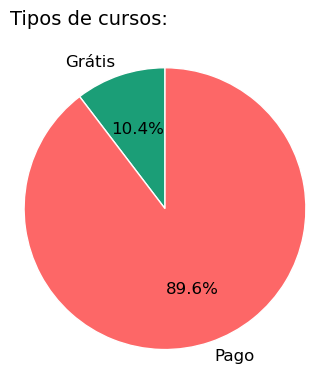

In [57]:
# Visualização em pizza da porcentagem de cursos grátis e pagos.
plt.figure(figsize = (4, 4))
plt.pie(udemy_cursos.groupby(['is_paid']).size(),
        labels = ['Grátis', 'Pago'], 
        autopct = '%1.1f%%',
        startangle = 90, colors = ['#1b9e77','#fd6767'],
        textprops = {'size': 12},
        wedgeprops= {"edgecolor":"white",
                     'linewidth': 1,
                     'antialiased': True})
plt.axis('equal')
plt.title('Tipos de cursos:\n',loc='left', fontdict={'fontsize': 14})
plt.show()

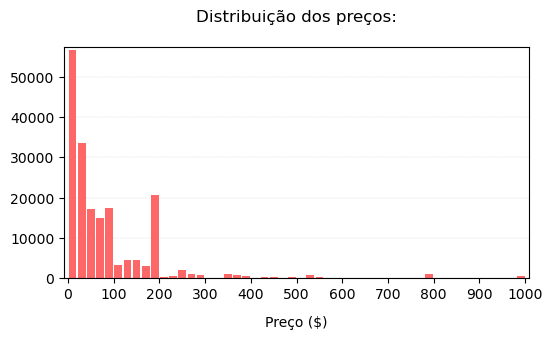

In [26]:
plt.rcParams.update({'font.size': 10, 'axes.axisbelow': True})
plt.figure(figsize = (6, 3))
plt.hist(udemy_cursos[udemy_cursos['is_paid']==True]['price'],bins=50,range=(0,1000), rwidth=0.85,
         color='#fd6767')
plt.grid(axis='y', color ='Grey',
        linestyle ='-.', linewidth = 0.1)
plt.xticks(range(0,1001,100))
plt.margins(0.01)
plt.xlabel("Preço ($)", labelpad=10)
plt.ylabel("")
plt.title('Distribuição dos preços:\n',loc='center', fontdict={'fontsize': 12})
plt.show()

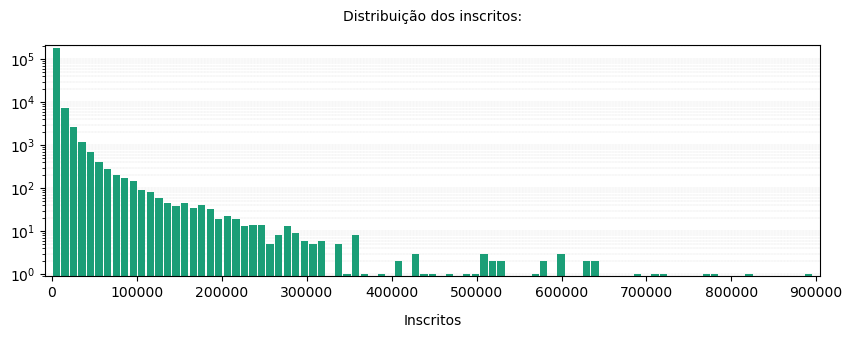

In [138]:
plt.figure(figsize = (10, 3))
plt.hist(udemy_cursos[(udemy_cursos['num_subscribers']>0) & (udemy_cursos['num_subscribers']<1e6)]['num_subscribers'],bins=89, rwidth=0.85, 
         color='#1b9e77')
plt.grid(axis='y', color ='Grey', which='both',
        linestyle ='-.', linewidth = 0.1)
plt.xticks(range(0,1000001,100000))
plt.margins(0.01)
plt.xlabel("Inscritos", labelpad=10)
plt.yscale('log')
plt.title('Distribuição dos inscritos:\n',loc='center')

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.show()

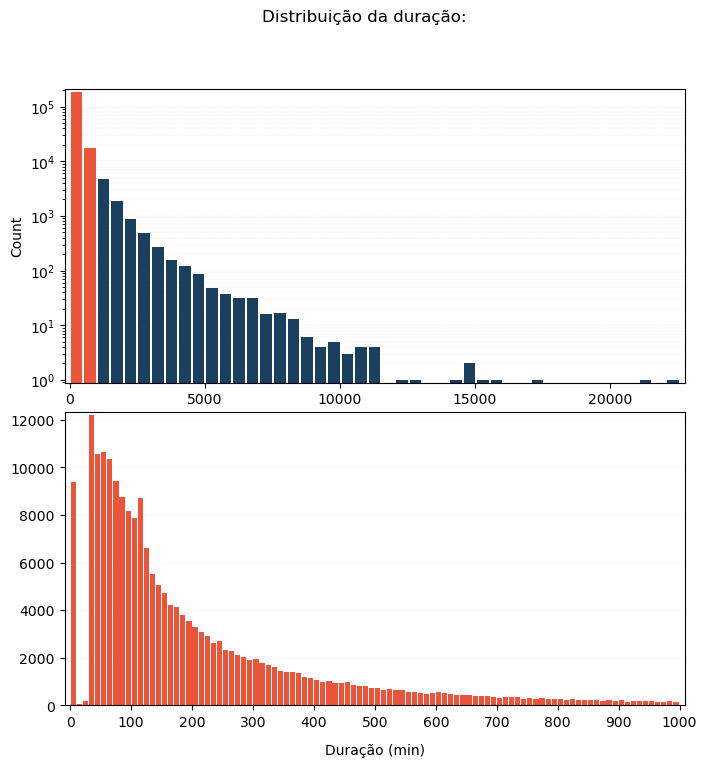

In [75]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize = (8, 8))
N, bins, patches = ax1.hist(udemy_cursos['content_length_min'], rwidth=0.85, bins=45,
         color='#1a3f5f')
ax1.grid(axis='y', color ='Grey',
        linestyle ='-.', linewidth = 0.1, which='both',
        alpha = 0.6)
ax1.margins(0.01)
patches[0].set_facecolor('#ed553b')
patches[1].set_facecolor('#ed553b')
plt.sca(ax1)
plt.yscale('log')
plt.ylabel("Count")
ax2.hist(udemy_cursos[udemy_cursos['content_length_min']<1000]['content_length_min'], rwidth=0.85, bins=100,
         color='#ed553b')
ax2.grid(axis='y', color ='Grey',
        linestyle ='-.', linewidth = 0.1,
        alpha = 0.6)
ax2.margins(0.01)
plt.sca(ax2)
plt.xlabel("Duração (min)", labelpad=10)
plt.ylabel("")
plt.xticks(range(0,1001,100))
plt.subplots_adjust(hspace=0.1)
plt.suptitle('Distribuição da duração:',fontsize=12)
plt.show()